In [136]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as stats

def addCO2(name):
    return name + " (CO2)"

def addBarrels(name):
    return name + " Barrels"

def floorFunc(val):
    return val.floor()

def terawattToOil(num):
    return ((num * 588441) / 365) / 1000

# This is where I got the production dataset
# https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

# Organize the main data sets

mainConsumptionData = pd.read_csv('./datasets/ourworld-oil-consumption-by-region.csv')
mainBarrelData = pd.read_excel('./datasets/oilProductionBarrels.xls')  
mainClimateChangeData = pd.read_csv('./datasets/climatechange1.csv')

countryOilData = mainBarrelData
countryClimateChangeData = mainClimateChangeData
countryConsumptionData = mainConsumptionData

countryConsumptionData = countryConsumptionData.drop(columns = ['Code'])

countryClimateChangeData = mainClimateChangeData[mainClimateChangeData['Series Name'] == 'Total greenhouse gas emissions (kt of CO2 equivalent)']
countryClimateChangeData['Country Name'] = countryClimateChangeData['Country Name'].apply(addCO2)

countryClimateChangeData = countryClimateChangeData.set_index('Country Name')
countryClimateChangeData = countryClimateChangeData.drop('Country Code', axis = 1)
countryClimateChangeData = countryClimateChangeData.drop('Series Name', axis = 1)
countryClimateChangeData = countryClimateChangeData.drop('Series Code', axis = 1)
countryClimateChangeData = countryClimateChangeData.drop('1960', axis = 1)
countryClimateChangeData = countryClimateChangeData.drop('1961', axis = 1)
countryClimateChangeData = countryClimateChangeData.drop('1962', axis = 1)
countryClimateChangeData = countryClimateChangeData.drop('1963', axis = 1)
countryClimateChangeData = countryClimateChangeData.drop('1964', axis = 1)

countryOilData = countryOilData.rename(columns={"Oil: Production*": "Unnamed: 0"})
countryOilData = countryOilData.rename(columns={"Contents": "Unnamed: 11"})

countryOilData = countryOilData.drop('Contents.1', axis = 1)
countryOilData = countryOilData.drop('Unnamed: 60', axis = 1)
countryOilData = countryOilData.drop('Unnamed: 59', axis = 1)
countryOilData = countryOilData.drop('Unnamed: 58', axis = 1)
countryOilData = countryOilData.drop('Unnamed: 57', axis = 1)

countryOilData = countryOilData.set_index('Unnamed: 0')
countryOilData.index.name = 'year'

# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
countryOilData = countryOilData.rename(columns=lambda x: int(x[9:]) + 1964)
# countryOilData

countryClimateChangeData.index.name = 'year'
x = np.arange(1970, 2019)

countryConsumptionData['Oil Consumption - TWh'] = countryConsumptionData['Oil Consumption - TWh'].apply(terawattToOil)
countryConsumptionData = countryConsumptionData.rename(columns={"Oil Consumption - TWh": "Thousands Barrels Per Day"})
#countryConsumptionData

<ipython-input-136-f2405460edf1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countryClimateChangeData['Country Name'] = countryClimateChangeData['Country Name'].apply(addCO2)


Canada Production R Value:  0.687308845506613
USA Production R Value:  -0.7042306185694069
Canada Consumption R Value:  0.8179868693828594
USA Consumption R Value:  0.8698772872269037


'\nplt.figure(figsize=(14, 7))\nplt.title(\'Canada Oil Production\')\nplt.scatter(x, northAmericaBarrelData[\'Canada\'], c=\'b\')\nplt.xlabel("year")\nplt.ylabel("Barrels (thousands daily)")\nplt.show()\n\nplt.figure(figsize=(14, 7))\nplt.title(\'United States CO2 emissions\')\nplt.scatter(x, northAmericaCO2Data[\'United States (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions")\n\nplt.figure(figsize=(14, 7))\nplt.title(\'United States Oil Production\')\nplt.scatter(x, northAmericaBarrelData[\'US\'], c=\'b\')\nplt.xlabel("year")\nplt.ylabel("Barrels (thousands daily)")\nplt.show()\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Mexico CO2 emissions\')\nplt.scatter(x, northAmericaCO2Data[\'Mexico (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions")\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Mexico Oil Production\')\nplt.scatter(x, northAmericaBarrelData[\'Mexico\'], c=\'b\')\nplt.xlabel("year")\nplt.ylabel("Barrels (thousands daily)")\nplt.show()\n\n#plt.save

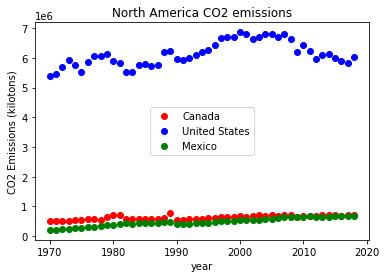

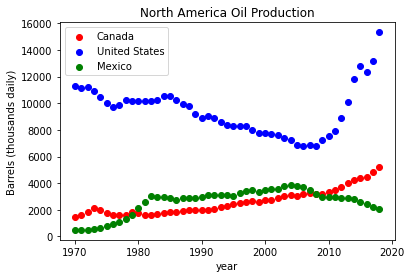

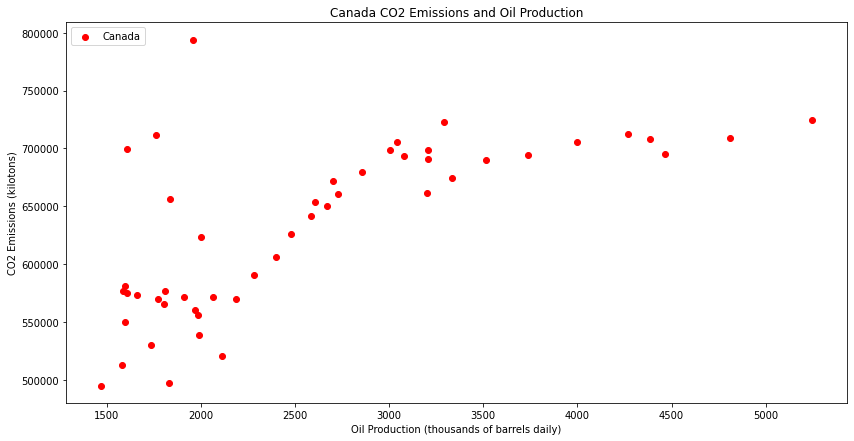

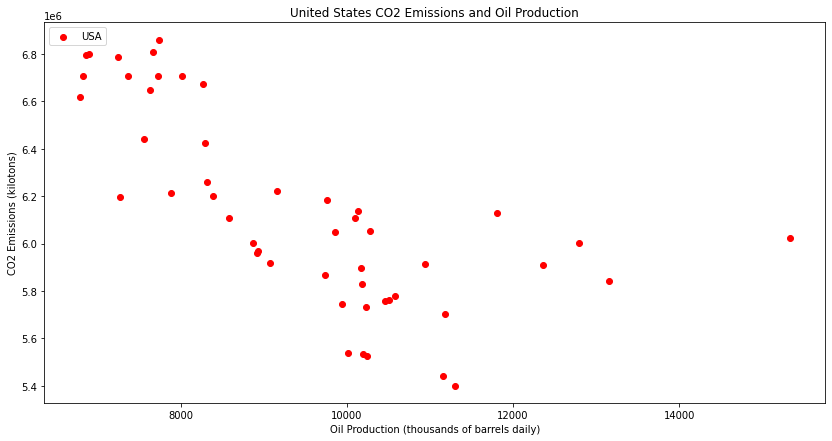

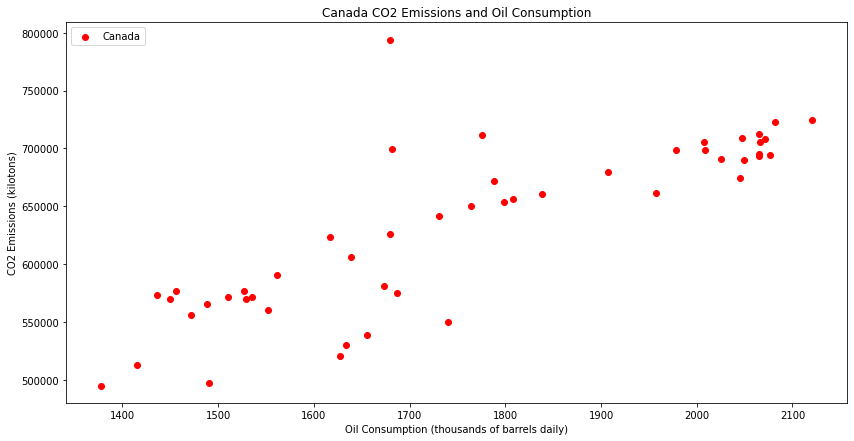

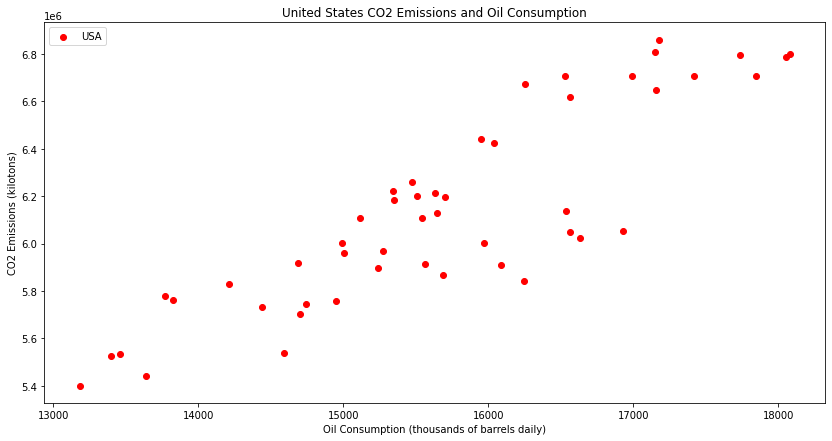

In [137]:
# --- Extract data for North American countries, and create a North America Dataset ---

# https://www.statology.org/pandas-select-rows-by-index/#:~:text=Often%20you%20may%20want%20to,indexing%2C%20you%20can%20use%20the%20.
canadaBarrelData = countryOilData.loc[['Canada']]
usBarrelData = countryOilData.loc[['US']]
mexicoBarrelData = countryOilData.loc[['Mexico']]

canadaCO2Data = countryClimateChangeData.loc[['Canada (CO2)']]
usCO2Data = countryClimateChangeData.loc[['United States (CO2)']]
mexicoCO2Data = countryClimateChangeData.loc[['Mexico (CO2)']]

canadaConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Canada']
canadaConsumptionData = canadaConsumptionData.set_index('Year')
canadaConsumptionData = canadaConsumptionData.drop('Entity', axis = 1)
canadaConsumptionData = canadaConsumptionData.rename(columns={"Thousands Barrels Per Day": "Canada"})
canadaConsumptionData = canadaConsumptionData[5:54]

usConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'United States']
usConsumptionData = usConsumptionData.set_index('Year')
usConsumptionData = usConsumptionData.drop('Entity', axis = 1)
usConsumptionData = usConsumptionData.rename(columns={"Thousands Barrels Per Day": "United States"})
usConsumptionData = usConsumptionData[5:54]

#usConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'United States']
#mexicoConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Mexico']

northAmericaBarrelData = pd.concat([canadaBarrelData, usBarrelData, mexicoBarrelData]).reset_index()
northAmericaBarrelData = northAmericaBarrelData.set_index('year')
northAmericaBarrelData = northAmericaBarrelData.T

northAmericaCO2Data = pd.concat([canadaCO2Data, usCO2Data, mexicoCO2Data])
northAmericaCO2Data = northAmericaCO2Data.T

northAmericaBarrelData = northAmericaBarrelData[5:54]
northAmericaCO2Data = northAmericaCO2Data[5:54]

canOil = countryOilData.loc[['Canada']].T
canOil = canOil[5:54]
canOil = canOil[['Canada']].to_numpy()

canClimate = countryClimateChangeData.loc[['Canada (CO2)']].T
canClimate = canClimate[5:54]
canClimate = canClimate[['Canada (CO2)']].to_numpy()

"""X_train, X_valid, y_train, y_valid = train_test_split(canOil, canClimate)

model = GradientBoostingClassifier(n_estimators=50,
        max_depth=2, min_samples_leaf=0.1)

model.fit(X_train, y_train)
print("Canada Train: ", model.score(X_train, y_train))
print("Canada Valid: ", model.score(X_valid, y_valid))

usOil = countryOilData.loc[['US']].T
usOil = usOil[5:54]
usOil = usOil[['US']].to_numpy()

usClimate = countryClimateChangeData.loc[['United States (CO2)']].T
usClimate = usClimate[5:54]
usClimate = usClimate[['United States (CO2)']].to_numpy()

X_train, X_valid, y_train, y_valid = train_test_split(usOil, usClimate)

model = GradientBoostingClassifier(n_estimators=50,
        max_depth=2, min_samples_leaf=0.1)

model.fit(X_train, y_train)
print("United States Train: ", model.score(X_train, y_train))
print("United States Valid: ", model.score(X_valid, y_valid))
"""

canadaProductionRegression = stats.linregress(northAmericaBarrelData['Canada'], northAmericaCO2Data['Canada (CO2)'].astype(float))
print("Canada Production R Value: ", canadaProductionRegression.rvalue)

usProductionRegression = stats.linregress(northAmericaBarrelData['US'], northAmericaCO2Data['United States (CO2)'].astype(float))
print("USA Production R Value: ", usProductionRegression.rvalue)

canadaConsumptionRegression = stats.linregress(canadaConsumptionData['Canada'], northAmericaCO2Data['Canada (CO2)'].astype(float))
print("Canada Consumption R Value: ", canadaConsumptionRegression.rvalue)

usConsumptionRegression = stats.linregress(usConsumptionData['United States'], northAmericaCO2Data['United States (CO2)'].astype(float))
print("USA Consumption R Value: ", usConsumptionRegression.rvalue)

plt.figure()
plt.title('North America CO2 emissions')
plt.scatter(x, northAmericaCO2Data['Canada (CO2)'].astype(float), c='r', label='Canada')
plt.scatter(x, northAmericaCO2Data['United States (CO2)'].astype(float), c='b', label="United States")
plt.scatter(x, northAmericaCO2Data['Mexico (CO2)'].astype(float), c='g', label="Mexico")
plt.legend(loc="center")
plt.xlabel("year")
plt.ylabel("CO2 Emissions (kilotons)")

plt.figure()
plt.title('North America Oil Production')
plt.scatter(x, northAmericaBarrelData['Canada'], c='r', label='Canada')
plt.scatter(x, northAmericaBarrelData['US'], c='b', label="United States")
plt.scatter(x, northAmericaBarrelData['Mexico'], c='g', label="Mexico")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")

plt.figure(figsize=(14, 7))
plt.title('Canada CO2 Emissions and Oil Production')
plt.scatter(northAmericaBarrelData['Canada'], northAmericaCO2Data['Canada (CO2)'].astype(float), c='r', label='Canada')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions (kilotons)")

plt.figure(figsize=(14, 7))
plt.title('United States CO2 Emissions and Oil Production')
plt.scatter(northAmericaBarrelData['US'], northAmericaCO2Data['United States (CO2)'].astype(float), c='r', label='USA')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions (kilotons)")

plt.figure(figsize=(14, 7))
plt.title('Canada CO2 Emissions and Oil Consumption')
plt.scatter(canadaConsumptionData['Canada'], northAmericaCO2Data['Canada (CO2)'].astype(float), c='r', label='Canada')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions (kilotons)")

plt.figure(figsize=(14, 7))
plt.title('United States CO2 Emissions and Oil Consumption')
plt.scatter(usConsumptionData['United States'], northAmericaCO2Data['United States (CO2)'].astype(float), c='r', label='USA')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions (kilotons)")

"""
plt.figure(figsize=(14, 7))
plt.title('Canada Oil Production')
plt.scatter(x, northAmericaBarrelData['Canada'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
plt.show()

plt.figure(figsize=(14, 7))
plt.title('United States CO2 emissions')
plt.scatter(x, northAmericaCO2Data['United States (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('United States Oil Production')
plt.scatter(x, northAmericaBarrelData['US'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
plt.show()

plt.figure(figsize=(14, 7))
plt.title('Mexico CO2 emissions')
plt.scatter(x, northAmericaCO2Data['Mexico (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Mexico Oil Production')
plt.scatter(x, northAmericaBarrelData['Mexico'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
plt.show()

#plt.savefig('canada.svg') # for final submission"""

#northAmericaData = pd.concat([northAmericaBarrelData, northAmericaCO2Data], axis = 1)

# northAmericaBarrelData
#usConsumptionData

Venezuela Production R Value:  0.11162461155240168
Brazil Production R Value:  -0.31756386831548516
Venezuela Consumption R Value:  0.9274119091807979
Brazil Consumption R Value:  -0.36201802130451327


'\nplt.figure(figsize=(14, 7))\nplt.title(\'Argentina CO2 emissions\')\nplt.scatter(x, southCentralAmericaCO2Data[\'Argentina (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions")\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Argentina Oil Production\')\nplt.scatter(x, southCentralAmericaBarrelData[\'Argentina\'], c=\'b\')\nplt.xlabel("year")\nplt.ylabel("Barrels (thousands daily)")\n#plt.show()\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Brazil CO2 emissions\')\nplt.scatter(x, southCentralAmericaCO2Data[\'Brazil (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions")\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Brazil Oil Production\')\nplt.scatter(x, southCentralAmericaBarrelData[\'Brazil\'], c=\'b\')\nplt.xlabel("year")\nplt.ylabel("Barrels (thousands daily)")\n#plt.show()\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Colombia CO2 emissions\')\nplt.scatter(x, southCentralAmericaCO2Data[\'Colombia (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions"

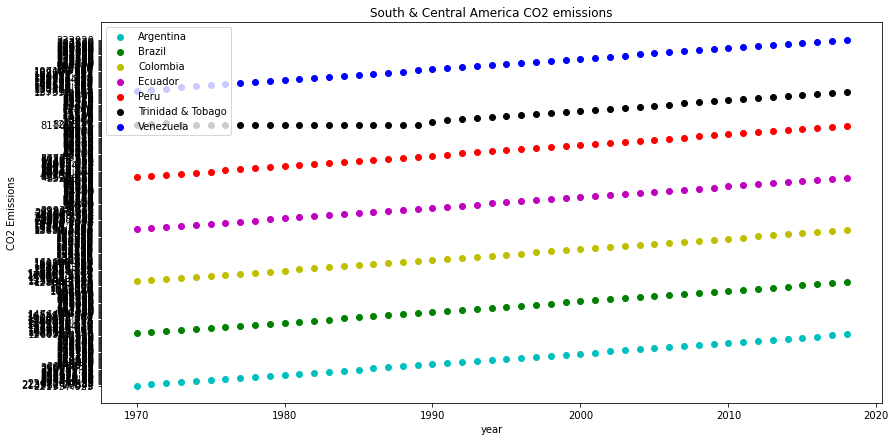

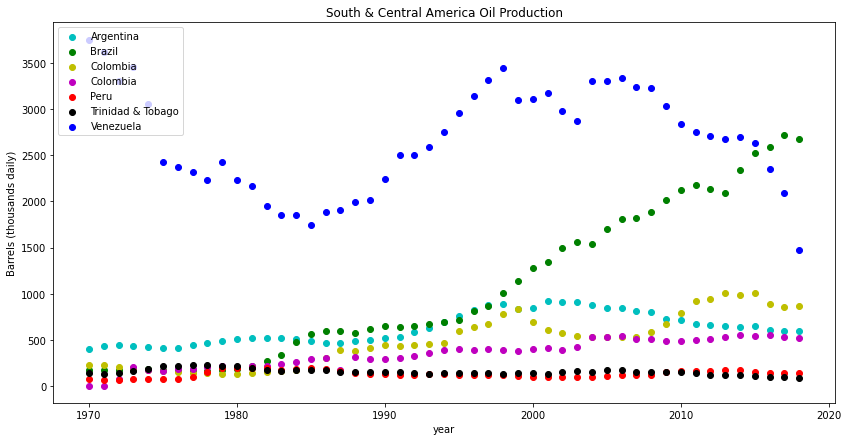

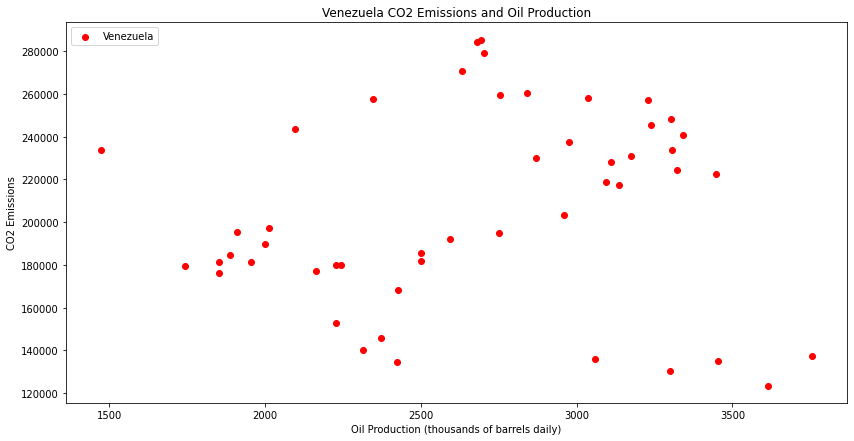

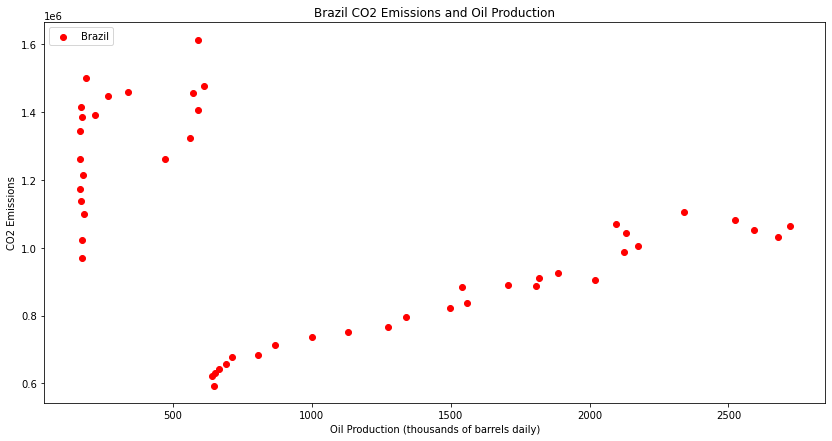

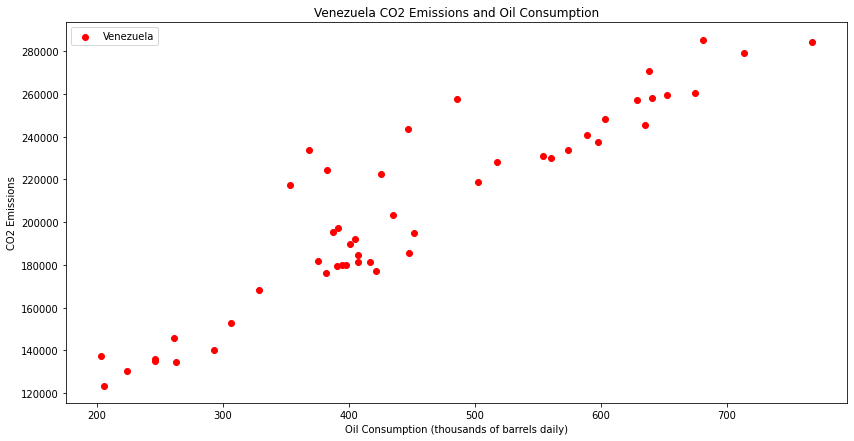

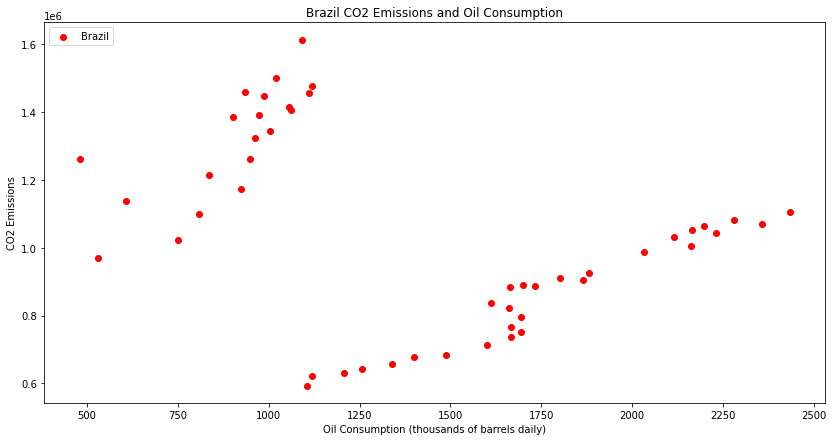

In [138]:
# --- Extract data for South & Central American countries, and create South & Central America Datasets ---

argentinaBarrelData = countryOilData.loc[['Argentina']]
brazilBarrelData = countryOilData.loc[['Brazil']]
colombiaBarrelData = countryOilData.loc[['Colombia']]
ecuadorBarrelData = countryOilData.loc[['Ecuador']]
peruBarrelData = countryOilData.loc[['Peru']]
trinidadBarrelData = countryOilData.loc[['Trinidad & Tobago']]
venezuelaBarrelData = countryOilData.loc[['Venezuela']]

argentinaCO2Data = countryClimateChangeData.loc[['Argentina (CO2)']]
brazilCO2Data = countryClimateChangeData.loc[['Brazil (CO2)']]
colombiaCO2Data = countryClimateChangeData.loc[['Colombia (CO2)']]
ecuadorCO2Data = countryClimateChangeData.loc[['Ecuador (CO2)']]
peruCO2Data = countryClimateChangeData.loc[['Peru (CO2)']]
trinidadCO2Data = countryClimateChangeData.loc[['Trinidad and Tobago (CO2)']]
venezuelaCO2Data = countryClimateChangeData.loc[['Venezuela, RB (CO2)']]

venezuelaConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Venezuela']
venezuelaConsumptionData = venezuelaConsumptionData.set_index('Year')
venezuelaConsumptionData = venezuelaConsumptionData.drop('Entity', axis = 1)
venezuelaConsumptionData = venezuelaConsumptionData.rename(columns={"Thousands Barrels Per Day": "Venezuela"})
venezuelaConsumptionData = venezuelaConsumptionData[5:54]

brazilConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Brazil']
brazilConsumptionData = brazilConsumptionData.set_index('Year')
brazilConsumptionData = brazilConsumptionData.drop('Entity', axis = 1)
brazilConsumptionData = brazilConsumptionData.rename(columns={"Thousands Barrels Per Day": "Brazil"})
brazilConsumptionData = brazilConsumptionData[5:54]

southCentralAmericaBarrelData = pd.concat([argentinaBarrelData, brazilBarrelData, colombiaBarrelData,
                              ecuadorBarrelData, peruBarrelData, trinidadBarrelData, venezuelaBarrelData]).reset_index()
southCentralAmericaBarrelData = southCentralAmericaBarrelData.set_index('year')
southCentralAmericaBarrelData = southCentralAmericaBarrelData.T

southCentralAmericaCO2Data = pd.concat([argentinaCO2Data, brazilCO2Data, colombiaCO2Data,
                                        ecuadorCO2Data, peruCO2Data, trinidadCO2Data, venezuelaCO2Data])
southCentralAmericaCO2Data = southCentralAmericaCO2Data.T

southCentralAmericaBarrelData = southCentralAmericaBarrelData[5:54]
southCentralAmericaCO2Data = southCentralAmericaCO2Data[5:54]

venezuelaProductionRegression = stats.linregress(southCentralAmericaBarrelData['Venezuela'], southCentralAmericaCO2Data['Venezuela, RB (CO2)'].astype(float))
print("Venezuela Production R Value: ", venezuelaProductionRegression.rvalue)

brazilProductionRegression = stats.linregress(southCentralAmericaBarrelData['Brazil'], southCentralAmericaCO2Data['Brazil (CO2)'].astype(float))
print("Brazil Production R Value: ", brazilProductionRegression.rvalue)

venezuelaConsumptionRegression = stats.linregress(venezuelaConsumptionData['Venezuela'], southCentralAmericaCO2Data['Venezuela, RB (CO2)'].astype(float))
print("Venezuela Consumption R Value: ", venezuelaConsumptionRegression.rvalue)

brazilConsumptionRegression = stats.linregress(brazilConsumptionData['Brazil'], southCentralAmericaCO2Data['Brazil (CO2)'].astype(float))
print("Brazil Consumption R Value: ", brazilConsumptionRegression.rvalue)

plt.figure(figsize=(14, 7))
plt.title('South & Central America CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Argentina (CO2)'], c='c', label='Argentina')
plt.scatter(x, southCentralAmericaCO2Data['Brazil (CO2)'], c='g', label="Brazil")
plt.scatter(x, southCentralAmericaCO2Data['Colombia (CO2)'], c='y', label="Colombia")
plt.scatter(x, southCentralAmericaCO2Data['Ecuador (CO2)'], c='m', label="Ecuador")
plt.scatter(x, southCentralAmericaCO2Data['Peru (CO2)'], c='r', label="Peru")
plt.scatter(x, southCentralAmericaCO2Data['Trinidad and Tobago (CO2)'], c='k', label="Trinidad & Tobago")
plt.scatter(x, southCentralAmericaCO2Data['Venezuela, RB (CO2)'], c='b', label="Venezuela")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('South & Central America Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Argentina'], c='c', label='Argentina')
plt.scatter(x, southCentralAmericaBarrelData['Brazil'], c='g', label="Brazil")
plt.scatter(x, southCentralAmericaBarrelData['Colombia'], c='y', label="Colombia")
plt.scatter(x, southCentralAmericaBarrelData['Ecuador'], c='m', label="Colombia")
plt.scatter(x, southCentralAmericaBarrelData['Peru'], c='r', label="Peru")
plt.scatter(x, southCentralAmericaBarrelData['Trinidad & Tobago'], c='k', label="Trinidad & Tobago")
plt.scatter(x, southCentralAmericaBarrelData['Venezuela'], c='b', label="Venezuela")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")

plt.figure(figsize=(14, 7))
plt.title('Venezuela CO2 Emissions and Oil Production')
plt.scatter(southCentralAmericaBarrelData['Venezuela'], southCentralAmericaCO2Data['Venezuela, RB (CO2)'].astype(float), c='r', label='Venezuela')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Brazil CO2 Emissions and Oil Production')
plt.scatter(southCentralAmericaBarrelData['Brazil'], southCentralAmericaCO2Data['Brazil (CO2)'].astype(float), c='r', label='Brazil')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Venezuela CO2 Emissions and Oil Consumption')
plt.scatter(venezuelaConsumptionData['Venezuela'], southCentralAmericaCO2Data['Venezuela, RB (CO2)'].astype(float), c='r', label='Venezuela')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Brazil CO2 Emissions and Oil Consumption')
plt.scatter(brazilConsumptionData['Brazil'], southCentralAmericaCO2Data['Brazil (CO2)'].astype(float), c='r', label='Brazil')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

"""
plt.figure(figsize=(14, 7))
plt.title('Argentina CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Argentina (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Argentina Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Argentina'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Brazil CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Brazil (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Brazil Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Brazil'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Colombia CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Colombia (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Colombia Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Colombia'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Ecuador CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Ecuador (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Ecuador Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Ecuador'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Peru CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Peru (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Peru Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Peru'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Trinidad & Tobago CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Trinidad and Tobago (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Trinidad & Tobago Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Trinidad & Tobago'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Venezuela CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Venezuela, RB (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Venezuela Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Venezuela'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()
"""
#southCentralAmericaBarrelData



Romania Production R Value:  0.7788802543808784
United Kingdom Production R Value:  -0.010138802251714284
Romania Consumption R Value:  0.9265907228850225
United Kingdom Consumption R Value:  0.70715432892122


'\nplt.figure(figsize=(14, 7))\nplt.title(\'Denmark CO2 emissions\')\nplt.scatter(x, southCentralAmericaCO2Data[\'Denmark (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions")\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Denmark Oil Production\')\nplt.scatter(x, southCentralAmericaBarrelData[\'Denmark\'], c=\'b\')\nplt.xlabel("year")\nplt.ylabel("Barrels (thousands daily)")\n#plt.show()\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Italy CO2 emissions\')\nplt.scatter(x, southCentralAmericaCO2Data[\'Italy (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions")\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Italy Oil Production\')\nplt.scatter(x, southCentralAmericaBarrelData[\'Italy\'], c=\'b\')\nplt.xlabel("year")\nplt.ylabel("Barrels (thousands daily)")\n#plt.show()\n\nplt.figure(figsize=(14, 7))\nplt.title(\'Norway CO2 emissions\')\nplt.scatter(x, southCentralAmericaCO2Data[\'Norway (CO2)\'], c=\'r\')\nplt.xlabel("year")\nplt.ylabel("CO2 Emissions")\n\nplt.figure(

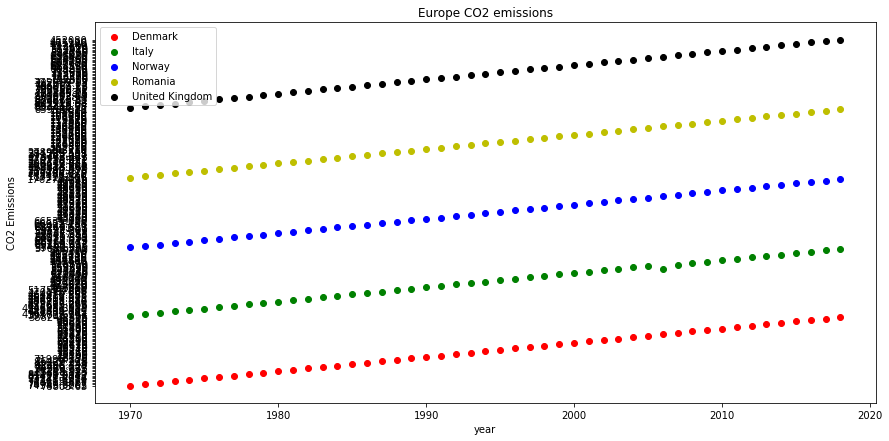

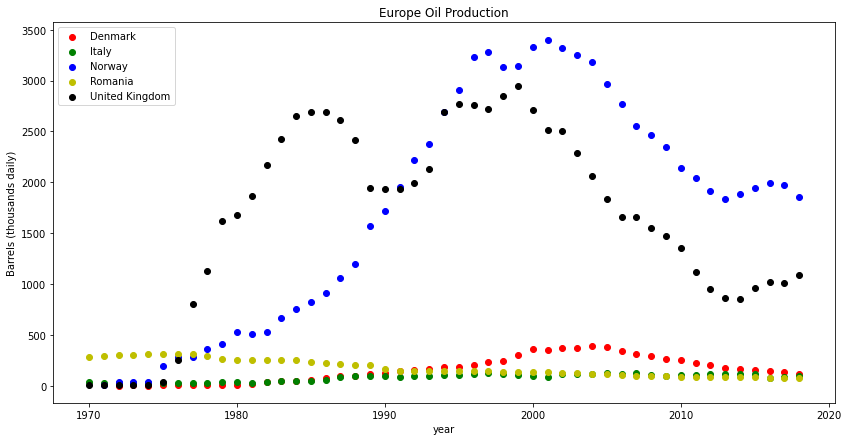

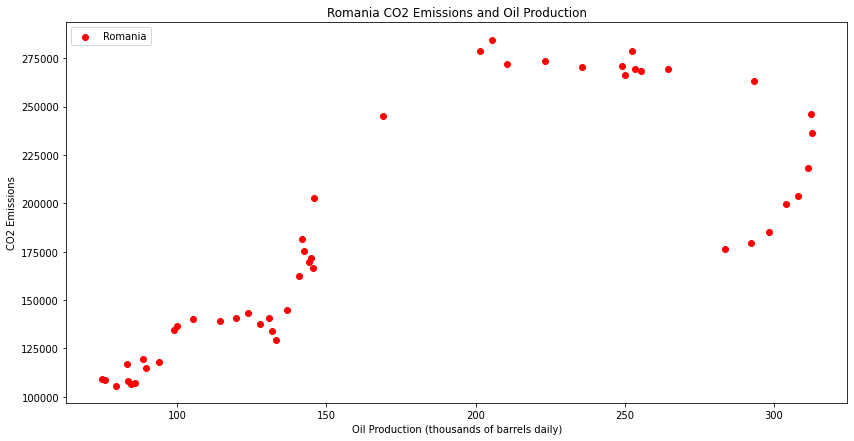

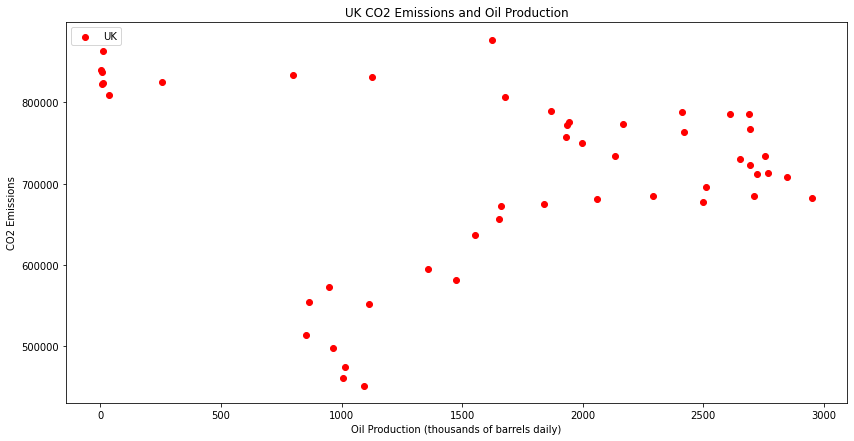

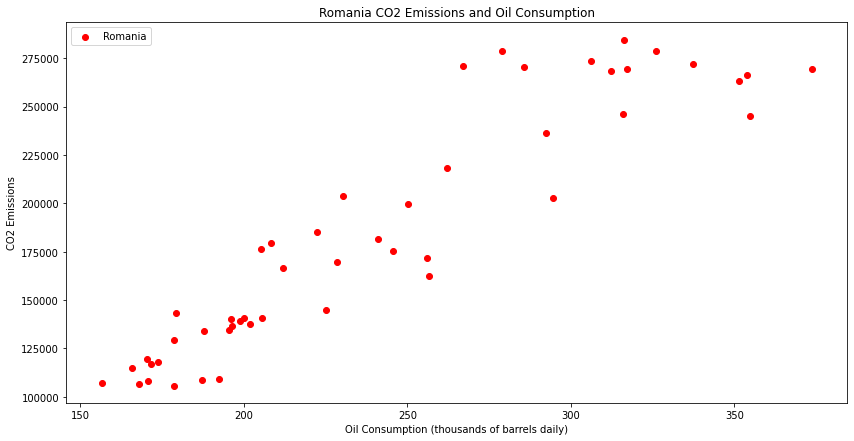

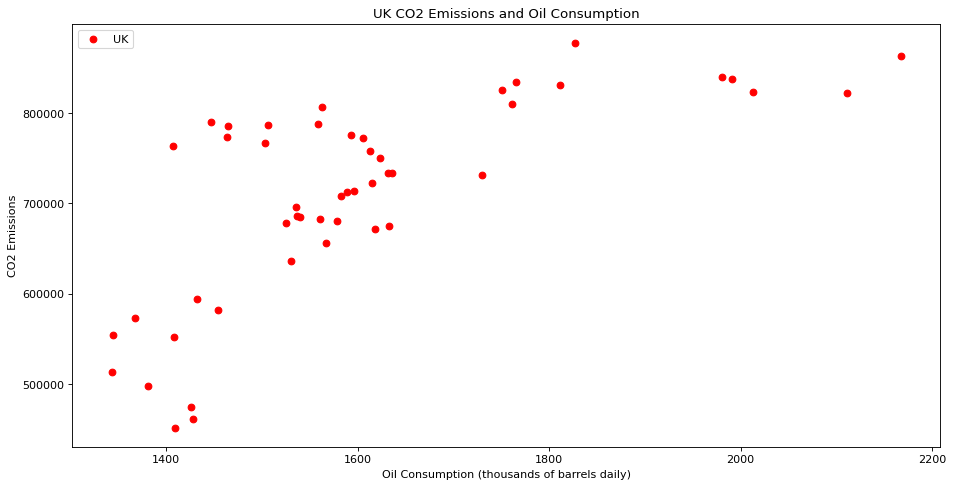

In [139]:
# --- Extract data for European countries, and create a Europe Dataset ---

denmarkBarrelData = countryOilData.loc[['Denmark']]
italyBarrelData = countryOilData.loc[['Italy']]
norwayBarrelData = countryOilData.loc[['Norway']]
romaniaBarrelData = countryOilData.loc[['Romania']]
ukBarrelData = countryOilData.loc[['United Kingdom']]

denmarkCO2Data = countryClimateChangeData.loc[['Denmark (CO2)']]
italyCO2Data = countryClimateChangeData.loc[['Italy (CO2)']]
norwayCO2Data = countryClimateChangeData.loc[['Norway (CO2)']]
romaniaCO2Data = countryClimateChangeData.loc[['Romania (CO2)']]
ukCO2Data = countryClimateChangeData.loc[['United Kingdom (CO2)']]

europeBarrelData = pd.concat([denmarkBarrelData, italyBarrelData, norwayBarrelData,
                              romaniaBarrelData, ukBarrelData]).reset_index()
europeBarrelData = europeBarrelData.set_index('year')
europeBarrelData = europeBarrelData.T

europeCO2Data = pd.concat([denmarkCO2Data, italyCO2Data, norwayCO2Data,
                              romaniaCO2Data, ukCO2Data])
europeCO2Data = europeCO2Data.T

europeBarrelData = europeBarrelData[5:54]
europeCO2Data = europeCO2Data[5:54]

norwayConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Norway']
norwayConsumptionData = norwayConsumptionData.set_index('Year')
norwayConsumptionData = norwayConsumptionData.drop('Entity', axis = 1)
norwayConsumptionData = norwayConsumptionData.rename(columns={"Thousands Barrels Per Day": "Norway"})
norwayConsumptionData = norwayConsumptionData[5:54]

ukConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'United Kingdom']
ukConsumptionData = ukConsumptionData.set_index('Year')
ukConsumptionData = ukConsumptionData.drop('Entity', axis = 1)
ukConsumptionData = ukConsumptionData.rename(columns={"Thousands Barrels Per Day": "United Kingdom"})
ukConsumptionData = ukConsumptionData[5:54]

romaniaConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Romania']
romaniaConsumptionData = romaniaConsumptionData.set_index('Year')
romaniaConsumptionData = romaniaConsumptionData.drop('Entity', axis = 1)
romaniaConsumptionData = romaniaConsumptionData.rename(columns={"Thousands Barrels Per Day": "Romania"})
romaniaConsumptionData = romaniaConsumptionData[5:54]

romaniaProductionRegression = stats.linregress(europeBarrelData['Romania'], europeCO2Data['Romania (CO2)'].astype(float))
print("Romania Production R Value: ", romaniaProductionRegression.rvalue)

ukProductionRegression = stats.linregress(europeBarrelData['United Kingdom'], europeCO2Data['United Kingdom (CO2)'].astype(float))
print("United Kingdom Production R Value: ", ukProductionRegression.rvalue)

romaniaConsumptionRegression = stats.linregress(romaniaConsumptionData['Romania'], europeCO2Data['Romania (CO2)'].astype(float))
print("Romania Consumption R Value: ", romaniaConsumptionRegression.rvalue)

ukConsumptionRegression = stats.linregress(ukConsumptionData['United Kingdom'], europeCO2Data['United Kingdom (CO2)'].astype(float))
print("United Kingdom Consumption R Value: ", ukConsumptionRegression.rvalue)


plt.figure(figsize=(14, 7))
plt.title('Europe CO2 emissions')
plt.scatter(x, europeCO2Data['Denmark (CO2)'], c='r', label='Denmark')
plt.scatter(x, europeCO2Data['Italy (CO2)'], c='g', label="Italy")
plt.scatter(x, europeCO2Data['Norway (CO2)'], c='b', label="Norway")
plt.scatter(x, europeCO2Data['Romania (CO2)'], c='y', label="Romania")
plt.scatter(x, europeCO2Data['United Kingdom (CO2)'], c='k', label="United Kingdom")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Europe Oil Production')
plt.scatter(x, europeBarrelData['Denmark'], c='r', label='Denmark')
plt.scatter(x, europeBarrelData['Italy'], c='g', label="Italy")
plt.scatter(x, europeBarrelData['Norway'], c='b', label="Norway")
plt.scatter(x, europeBarrelData['Romania'], c='y', label="Romania")
plt.scatter(x, europeBarrelData['United Kingdom'], c='k', label="United Kingdom")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")

plt.figure(figsize=(14, 7))
plt.title('Romania CO2 Emissions and Oil Production')
plt.scatter(europeBarrelData['Romania'], europeCO2Data['Romania (CO2)'].astype(float), c='r', label='Romania')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('UK CO2 Emissions and Oil Production')
plt.scatter(europeBarrelData['United Kingdom'], europeCO2Data['United Kingdom (CO2)'].astype(float), c='r', label='UK')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Romania CO2 Emissions and Oil Consumption')
plt.scatter(romaniaConsumptionData['Romania'], europeCO2Data['Romania (CO2)'].astype(float), c='r', label='Romania')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7), dpi=80)
plt.title('UK CO2 Emissions and Oil Consumption')
plt.scatter(ukConsumptionData['United Kingdom'], europeCO2Data['United Kingdom (CO2)'].astype(float), c='r', label='UK')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")


"""
plt.figure(figsize=(14, 7))
plt.title('Denmark CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Denmark (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Denmark Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Denmark'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Italy CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Italy (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Italy Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Italy'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Norway CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Norway (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Norway Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Norway'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('Romania CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['Romania (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Romania Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['Romania'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()

plt.figure(figsize=(14, 7))
plt.title('United Kingdom CO2 emissions')
plt.scatter(x, southCentralAmericaCO2Data['United Kingdom (CO2)'], c='r')
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('United Kingdom Oil Production')
plt.scatter(x, southCentralAmericaBarrelData['United Kingdom'], c='b')
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")
#plt.show()
"""

#europeBarrelData

#ukConsumptionData

In [141]:
# --- Extract data for CIS (Commonwealth of Independant States) countries, and create a CIS Dataset ---

azerbaijanBarrelData = countryOilData.loc[['Azerbaijan']]
kazakhstanBarrelData = countryOilData.loc[['Kazakhstan']]
russiaBarrelData = countryOilData.loc[['Russian Federation']]
turkmenistanBarrelData = countryOilData.loc[['Turkmenistan']]
ussrBarrelData = countryOilData.loc[['USSR']]
uzbekistanBarrelData = countryOilData.loc[['Uzbekistan']]

azerbaijanCO2Data = countryClimateChangeData.loc[['Azerbaijan (CO2)']]
kazakhstanCO2Data = countryClimateChangeData.loc[['Kazakhstan (CO2)']]
russiaCO2Data = countryClimateChangeData.loc[['Russian Federation (CO2)']]
turkmenistanCO2Data = countryClimateChangeData.loc[['Turkmenistan (CO2)']]
# No data for USSR emissions 
uzbekistanCO2Data = countryClimateChangeData.loc[['Uzbekistan (CO2)']]

cisBarrelData = pd.concat([azerbaijanBarrelData, kazakhstanBarrelData, russiaBarrelData,
                              turkmenistanCO2Data, ussrBarrelData, uzbekistanBarrelData]).reset_index()
cisBarrelData = cisBarrelData.set_index('year')
cisBarrelData = cisBarrelData.T

cisCO2Data = pd.concat([azerbaijanCO2Data, kazakhstanCO2Data, russiaCO2Data,
                              turkmenistanBarrelData, uzbekistanCO2Data])
cisCO2Data = cisCO2Data.T

cisBarrelData = cisBarrelData[5:54]
cisCO2Data = cisCO2Data[5:54]

#cisBarrelData



United Arab Emirates Production R Value:  0.9362068412574374
Iran Production R Value:  0.2485263967178313
United Arab Emirates Consumption R Value:  0.9420267189895021
Iran Consumption R Value:  0.9093689633450283


Text(0, 0.5, 'CO2 Emissions')

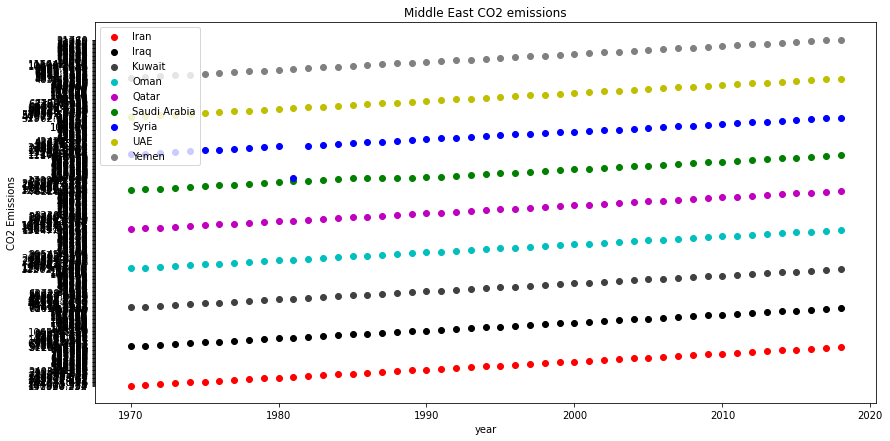

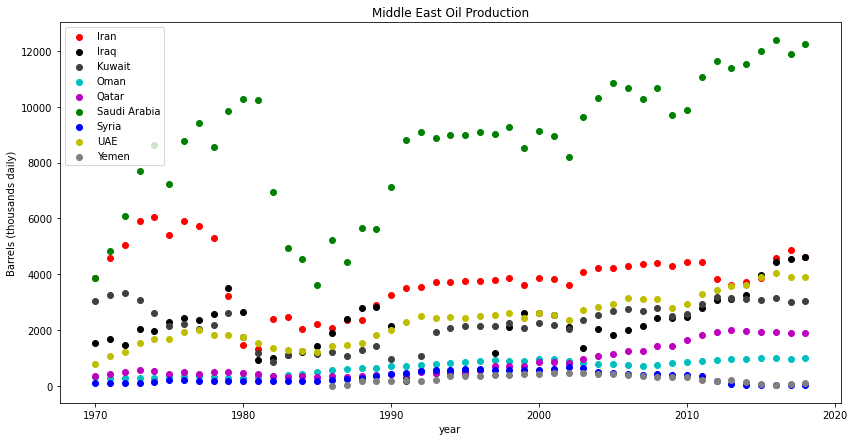

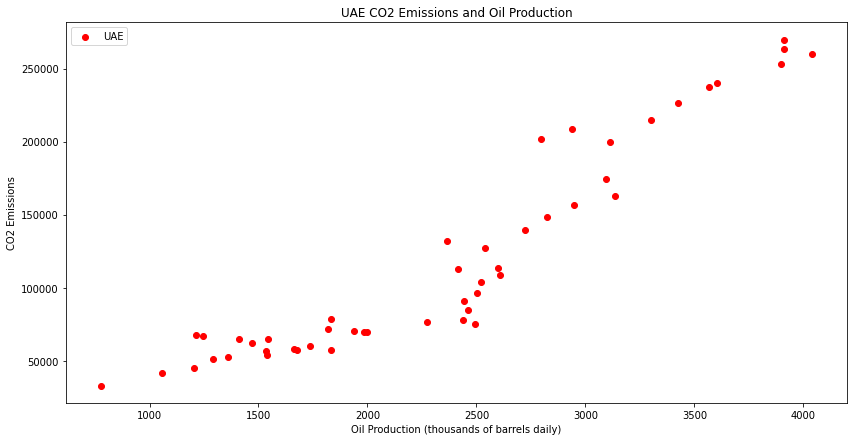

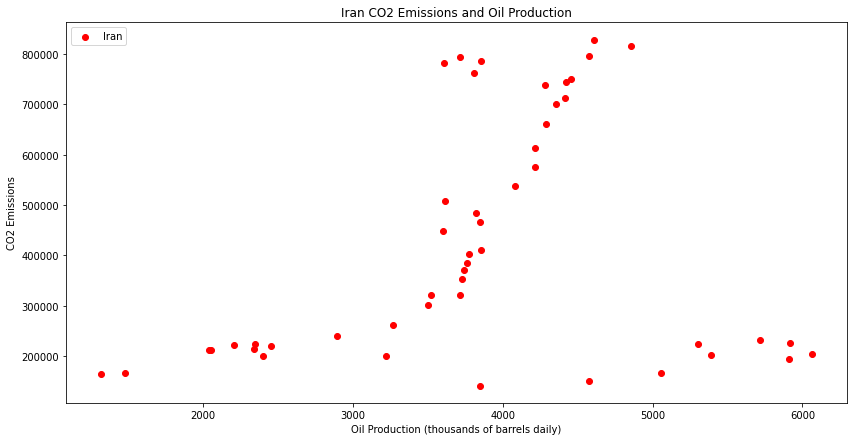

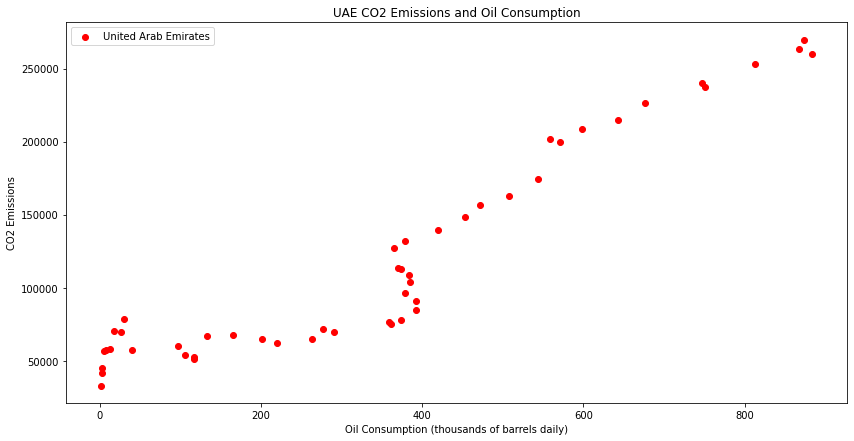

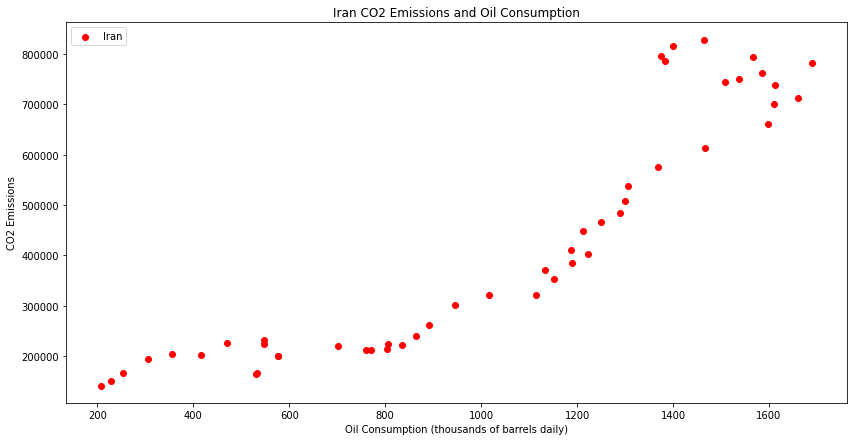

In [142]:
# --- Extract data for Middle Eastern countries, and create a Middle East Dataset ---

iranBarrelData = countryOilData.loc[['Iran']]
iraqBarrelData = countryOilData.loc[['Iraq']]
kuwaitBarrelData = countryOilData.loc[['Kuwait']]
omanBarrelData = countryOilData.loc[['Oman']]
qatarBarrelData = countryOilData.loc[['Qatar']]
saudiBarrelData = countryOilData.loc[['Saudi Arabia']]
syriaBarrelData = countryOilData.loc[['Syria']]
uaeBarrelData = countryOilData.loc[['United Arab Emirates']]
yemenBarrelData = countryOilData.loc[['Yemen']]

iranCO2Data = countryClimateChangeData.loc[['Iran, Islamic Rep. (CO2)']]
iraqCO2Data = countryClimateChangeData.loc[['Iraq (CO2)']]
kuwaitCO2Data = countryClimateChangeData.loc[['Kuwait (CO2)']]
omanCO2Data = countryClimateChangeData.loc[['Oman (CO2)']]
qatarCO2Data = countryClimateChangeData.loc[['Qatar (CO2)']]
saudiCO2Data = countryClimateChangeData.loc[['Saudi Arabia (CO2)']]
syriaCO2Data = countryClimateChangeData.loc[['Syrian Arab Republic (CO2)']]
uaeCO2Data = countryClimateChangeData.loc[['United Arab Emirates (CO2)']]
yemenCO2Data = countryClimateChangeData.loc[['Yemen, Rep. (CO2)']]

saudiConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Saudi Arabia']
saudiConsumptionData = saudiConsumptionData.set_index('Year')
saudiConsumptionData = saudiConsumptionData.drop('Entity', axis = 1)
saudiConsumptionData = saudiConsumptionData.rename(columns={"Thousands Barrels Per Day": "Saudi Arabia"})
saudiConsumptionData = saudiConsumptionData[5:54]

iranConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Iran']
iranConsumptionData = iranConsumptionData.set_index('Year')
iranConsumptionData = iranConsumptionData.drop('Entity', axis = 1)
iranConsumptionData = iranConsumptionData.rename(columns={"Thousands Barrels Per Day": "Iran"})
iranConsumptionData = iranConsumptionData[5:54]

uaeConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'United Arab Emirates']
uaeConsumptionData = uaeConsumptionData.set_index('Year')
uaeConsumptionData = uaeConsumptionData.drop('Entity', axis = 1)
uaeConsumptionData = uaeConsumptionData.rename(columns={"Thousands Barrels Per Day": "United Arab Emirates"})
uaeConsumptionData = uaeConsumptionData[5:54]

middleEastBarrelData = pd.concat([iranBarrelData, iraqBarrelData, kuwaitBarrelData,
                            omanBarrelData, qatarBarrelData, saudiBarrelData,
                            syriaBarrelData, uaeBarrelData, yemenBarrelData]).reset_index()
middleEastBarrelData = middleEastBarrelData.set_index('year')
middleEastBarrelData = middleEastBarrelData.T

middleEastCO2Data = pd.concat([iranCO2Data, iraqCO2Data, kuwaitCO2Data,
                            omanCO2Data, qatarCO2Data, saudiCO2Data,
                            syriaCO2Data, uaeCO2Data, yemenCO2Data])
middleEastCO2Data = middleEastCO2Data.T

middleEastBarrelData = middleEastBarrelData[5:54]
middleEastCO2Data = middleEastCO2Data[5:54]

uaeProductionRegression = stats.linregress(middleEastBarrelData['United Arab Emirates'], middleEastCO2Data['United Arab Emirates (CO2)'].astype(float))
print("United Arab Emirates Production R Value: ", uaeProductionRegression.rvalue)

iranProductionRegression = stats.linregress(middleEastBarrelData['Iran'], middleEastCO2Data['Iran, Islamic Rep. (CO2)'].astype(float))
print("Iran Production R Value: ", iranProductionRegression.rvalue)

uaeConsumptionRegression = stats.linregress(uaeConsumptionData['United Arab Emirates'], middleEastCO2Data['United Arab Emirates (CO2)'].astype(float))
print("United Arab Emirates Consumption R Value: ", uaeConsumptionRegression.rvalue)

iranConsumptionRegression = stats.linregress(iranConsumptionData['Iran'], middleEastCO2Data['Iran, Islamic Rep. (CO2)'].astype(float))
print("Iran Consumption R Value: ", iranConsumptionRegression.rvalue)


plt.figure(figsize=(14, 7))
plt.title('Middle East CO2 emissions')
plt.scatter(x, middleEastCO2Data['Iran, Islamic Rep. (CO2)'], c='r', label='Iran')
plt.scatter(x, middleEastCO2Data['Iraq (CO2)'], c='k', label="Iraq")
plt.scatter(x, middleEastCO2Data['Kuwait (CO2)'], c='0.25', label="Kuwait")
plt.scatter(x, middleEastCO2Data['Oman (CO2)'], c='c', label="Oman")
plt.scatter(x, middleEastCO2Data['Qatar (CO2)'], c='m', label="Qatar")
plt.scatter(x, middleEastCO2Data['Saudi Arabia (CO2)'], c='g', label="Saudi Arabia")
plt.scatter(x, middleEastCO2Data['Syrian Arab Republic (CO2)'], c='b', label="Syria")
plt.scatter(x, middleEastCO2Data['United Arab Emirates (CO2)'], c='y', label="UAE")
plt.scatter(x, middleEastCO2Data['Yemen, Rep. (CO2)'], c='0.5', label="Yemen")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Middle East Oil Production')
plt.scatter(x, middleEastBarrelData['Iran'], c='r', label='Iran')
plt.scatter(x, middleEastBarrelData['Iraq'], c='k', label="Iraq")
plt.scatter(x, middleEastBarrelData['Kuwait'], c='0.25', label="Kuwait")
plt.scatter(x, middleEastBarrelData['Oman'], c='c', label="Oman")
plt.scatter(x, middleEastBarrelData['Qatar'], c='m', label="Qatar")
plt.scatter(x, middleEastBarrelData['Saudi Arabia'], c='g', label="Saudi Arabia")
plt.scatter(x, middleEastBarrelData['Syria'], c='b', label="Syria")
plt.scatter(x, middleEastBarrelData['United Arab Emirates'], c='y', label="UAE")
plt.scatter(x, middleEastBarrelData['Yemen'], c='0.5', label="Yemen")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")

plt.figure(figsize=(14, 7))
plt.title('UAE CO2 Emissions and Oil Production')
plt.scatter(middleEastBarrelData['United Arab Emirates'], middleEastCO2Data['United Arab Emirates (CO2)'].astype(float), c='r', label='UAE')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Iran CO2 Emissions and Oil Production')
plt.scatter(middleEastBarrelData['Iran'], middleEastCO2Data['Iran, Islamic Rep. (CO2)'].astype(float), c='r', label='Iran')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('UAE CO2 Emissions and Oil Consumption')
plt.scatter(uaeConsumptionData['United Arab Emirates'], middleEastCO2Data['United Arab Emirates (CO2)'].astype(float), c='r', label='United Arab Emirates')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Iran CO2 Emissions and Oil Consumption')
plt.scatter(iranConsumptionData['Iran'], middleEastCO2Data['Iran, Islamic Rep. (CO2)'].astype(float), c='r', label='Iran')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")


#middleEastBarrelData



Algeria Production R Value:  0.734082247384237
Egypt Production R Value:  0.3993552656140737
Algeria Consumption R Value:  0.9810544331297969
Egypt Consumption R Value:  0.9553166283415205


Text(0, 0.5, 'CO2 Emissions')

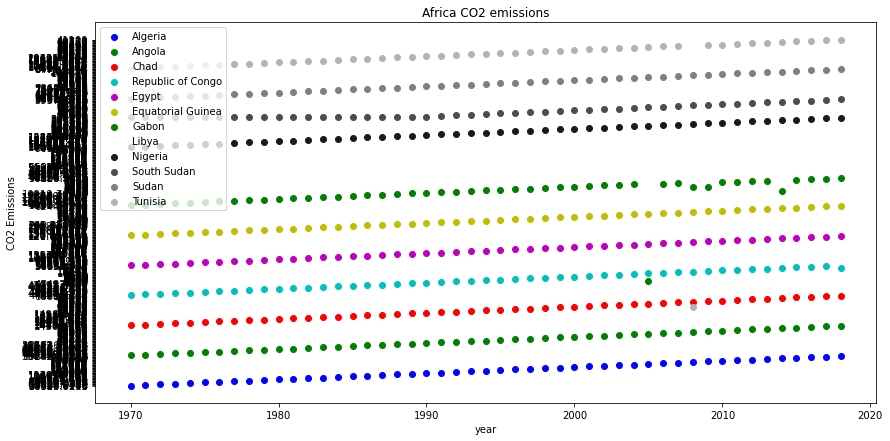

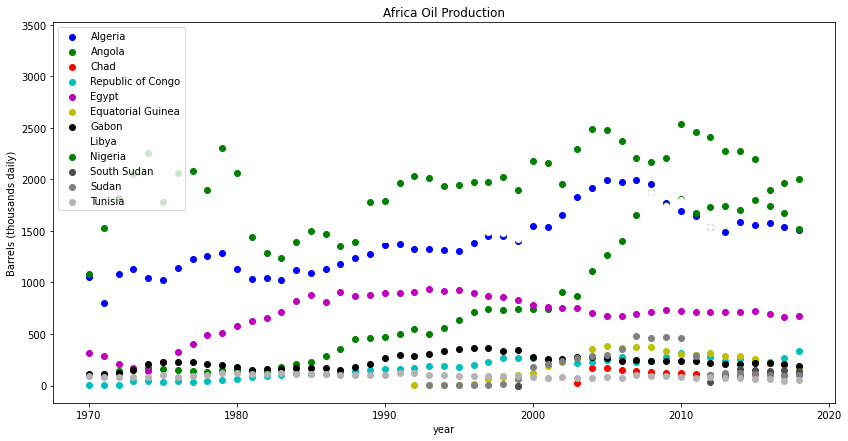

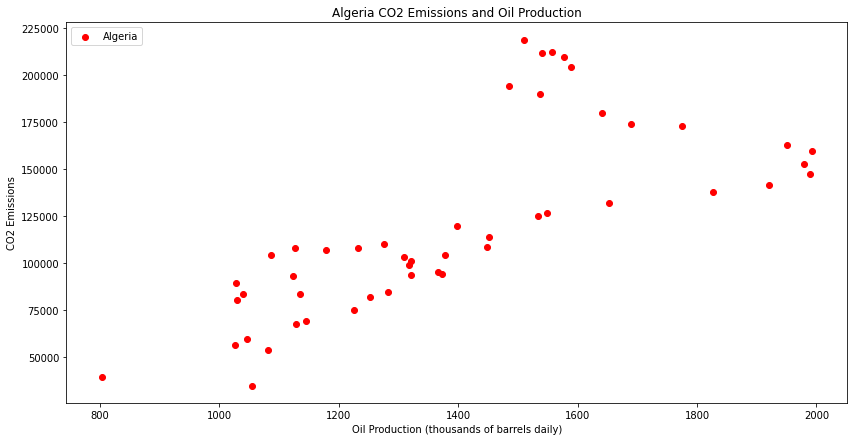

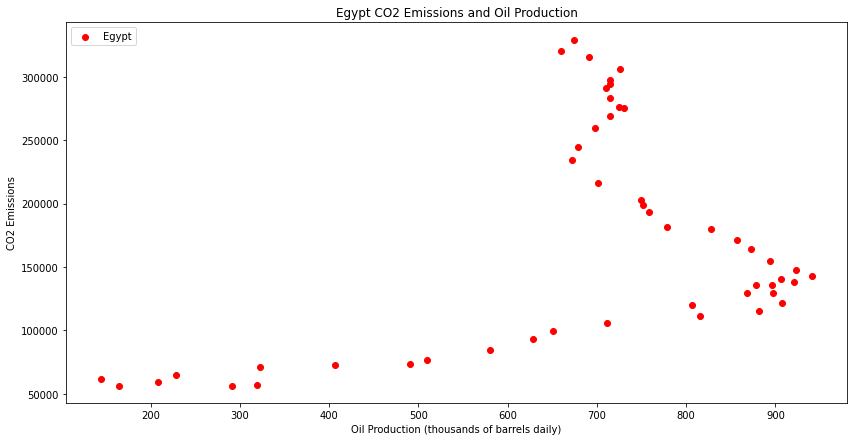

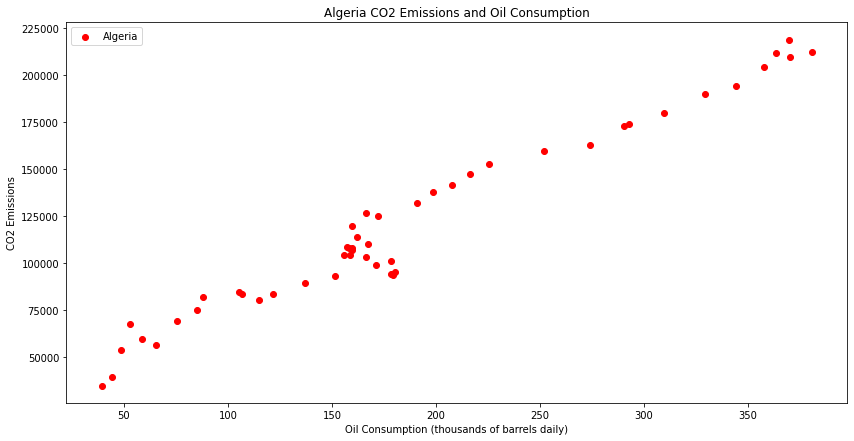

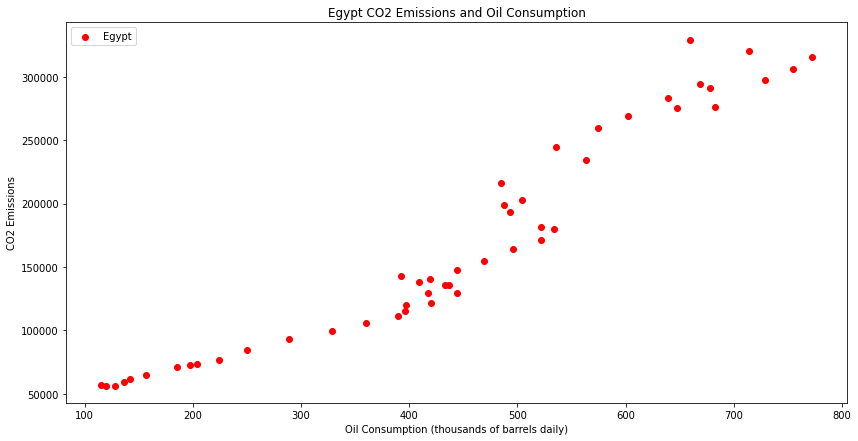

In [143]:
algeriaBarrelData = countryOilData.loc[['Algeria']]
angolaBarrelData = countryOilData.loc[['Angola']]
chadBarrelData = countryOilData.loc[['Chad']]
repCongoBarrelData = countryOilData.loc[['Republic of Congo ']]
egyptBarrelData = countryOilData.loc[['Egypt']]
eqGuineaBarrelData = countryOilData.loc[['Equatorial Guinea']]
gabonBarrelData = countryOilData.loc[['Gabon']]
libyaBarrelData = countryOilData.loc[['Libya']]
nigeriaBarrelData = countryOilData.loc[['Nigeria']]
southSudanBarrelData = countryOilData.loc[['South Sudan']]
sudanBarrelData = countryOilData.loc[['Sudan']]
tunisiaBarrelData = countryOilData.loc[['Tunisia']]

algeriaCO2Data = countryClimateChangeData.loc[['Algeria (CO2)']]
angolaCO2Data = countryClimateChangeData.loc[['Angola (CO2)']]
chadCO2Data = countryClimateChangeData.loc[['Chad (CO2)']]
repCongoCO2Data = countryClimateChangeData.loc[['Congo, Rep. (CO2)']]
egyptCO2Data = countryClimateChangeData.loc[['Egypt, Arab Rep. (CO2)']]
eqGuineaCO2Data = countryClimateChangeData.loc[['Equatorial Guinea (CO2)']]
gabonCO2Data = countryClimateChangeData.loc[['Gabon (CO2)']]
libyaCO2Data = countryClimateChangeData.loc[['Libya (CO2)']]
nigeriaCO2Data = countryClimateChangeData.loc[['Nigeria (CO2)']]
southSudanCO2Data = countryClimateChangeData.loc[['South Sudan (CO2)']]
sudanCO2Data = countryClimateChangeData.loc[['Sudan (CO2)']]
tunisiaCO2Data = countryClimateChangeData.loc[['Tunisia (CO2)']]

africaBarrelData = pd.concat([algeriaBarrelData, angolaBarrelData, chadBarrelData,
                            repCongoBarrelData, egyptBarrelData, eqGuineaBarrelData,
                            gabonBarrelData, libyaBarrelData, nigeriaBarrelData,
                            southSudanBarrelData, sudanBarrelData, tunisiaBarrelData]).reset_index()
africaBarrelData = africaBarrelData.set_index('year')
africaBarrelData = africaBarrelData.T

africaCO2Data = pd.concat([algeriaCO2Data, angolaCO2Data, chadCO2Data,
                            repCongoCO2Data, egyptCO2Data, eqGuineaCO2Data,
                            gabonCO2Data, libyaCO2Data, nigeriaCO2Data,
                            southSudanCO2Data, sudanCO2Data, tunisiaCO2Data])
africaCO2Data = africaCO2Data.T

africaBarrelData = africaBarrelData[5:54]
africaCO2Data = africaCO2Data[5:54]

algeriaConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Algeria']
algeriaConsumptionData = algeriaConsumptionData.set_index('Year')
algeriaConsumptionData = algeriaConsumptionData.drop('Entity', axis = 1)
algeriaConsumptionData = algeriaConsumptionData.rename(columns={"Thousands Barrels Per Day": "Algeria"})
algeriaConsumptionData = algeriaConsumptionData[5:54]

egyptConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Egypt']
egyptConsumptionData = egyptConsumptionData.set_index('Year')
egyptConsumptionData = egyptConsumptionData.drop('Entity', axis = 1)
egyptConsumptionData = egyptConsumptionData.rename(columns={"Thousands Barrels Per Day": "Egypt"})
egyptConsumptionData = egyptConsumptionData[5:54]

algeriaProductionRegression = stats.linregress(africaBarrelData['Algeria'], africaCO2Data['Algeria (CO2)'].astype(float))
print("Algeria Production R Value: ", algeriaProductionRegression.rvalue)

egyptProductionRegression = stats.linregress(africaBarrelData['Egypt'], africaCO2Data['Egypt, Arab Rep. (CO2)'].astype(float))
print("Egypt Production R Value: ", egyptProductionRegression.rvalue)

algeriaConsumptionRegression = stats.linregress(algeriaConsumptionData['Algeria'], africaCO2Data['Algeria (CO2)'].astype(float))
print("Algeria Consumption R Value: ", algeriaConsumptionRegression.rvalue)

egyptConsumptionRegression = stats.linregress(egyptConsumptionData['Egypt'], africaCO2Data['Egypt, Arab Rep. (CO2)'].astype(float))
print("Egypt Consumption R Value: ", egyptConsumptionRegression.rvalue)


plt.figure(figsize=(14, 7))
plt.title('Africa CO2 emissions')
plt.scatter(x, africaCO2Data['Algeria (CO2)'], c='b', label='Algeria')
plt.scatter(x, africaCO2Data['Angola (CO2)'], c='g', label="Angola")
plt.scatter(x, africaCO2Data['Chad (CO2)'], c='r', label="Chad")
plt.scatter(x, africaCO2Data['Congo, Rep. (CO2)'], c='c', label="Republic of Congo")
plt.scatter(x, africaCO2Data['Egypt, Arab Rep. (CO2)'], c='m', label="Egypt")
plt.scatter(x, africaCO2Data['Equatorial Guinea (CO2)'], c='y', label="Equatorial Guinea")
plt.scatter(x, africaCO2Data['Gabon (CO2)'], c='g', label="Gabon")
plt.scatter(x, africaCO2Data['Libya (CO2)'], c='w', label="Libya")
plt.scatter(x, africaCO2Data['Nigeria (CO2)'], c='0.10', label="Nigeria")
plt.scatter(x, africaCO2Data['South Sudan (CO2)'], c='0.30', label="South Sudan")
plt.scatter(x, africaCO2Data['Sudan (CO2)'], c='0.50', label="Sudan")
plt.scatter(x, africaCO2Data['Tunisia (CO2)'], c='0.70', label="Tunisia")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Africa Oil Production')
plt.scatter(x, africaBarrelData['Algeria'], c='b', label='Algeria')
plt.scatter(x, africaBarrelData['Angola'], c='g', label="Angola")
plt.scatter(x, africaBarrelData['Chad'], c='r', label="Chad")
plt.scatter(x, africaBarrelData['Republic of Congo '], c='c', label="Republic of Congo")
plt.scatter(x, africaBarrelData['Egypt'], c='m', label="Egypt")
plt.scatter(x, africaBarrelData['Equatorial Guinea'], c='y', label="Equatorial Guinea")
plt.scatter(x, africaBarrelData['Gabon'], c='k', label="Gabon")
plt.scatter(x, africaBarrelData['Libya'], c='w', label="Libya")
plt.scatter(x, africaBarrelData['Nigeria'], c='g', label="Nigeria")
plt.scatter(x, africaBarrelData['South Sudan'], c='0.30', label="South Sudan")
plt.scatter(x, africaBarrelData['Sudan'], c='0.50', label="Sudan")
plt.scatter(x, africaBarrelData['Tunisia'], c='0.70', label="Tunisia")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("Barrels (thousands daily)")

plt.figure(figsize=(14, 7))
plt.title('Algeria CO2 Emissions and Oil Production')
plt.scatter(africaBarrelData['Algeria'], africaCO2Data['Algeria (CO2)'].astype(float), c='r', label='Algeria')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Egypt CO2 Emissions and Oil Production')
plt.scatter(africaBarrelData['Egypt'], africaCO2Data['Egypt, Arab Rep. (CO2)'].astype(float), c='r', label='Egypt')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Algeria CO2 Emissions and Oil Consumption')
plt.scatter(algeriaConsumptionData['Algeria'], africaCO2Data['Algeria (CO2)'].astype(float), c='r', label='Algeria')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Egypt CO2 Emissions and Oil Consumption')
plt.scatter(egyptConsumptionData['Egypt'], africaCO2Data['Egypt, Arab Rep. (CO2)'].astype(float), c='r', label='Egypt')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")


#africaBarrelData



China Production R Value:  0.8511150498563653
Indonesia Production R Value:  -0.07536748117555309
China Consumption R Value:  0.9892593898072221
Indonesia Consumption R Value:  0.11027135237708585


Text(0, 0.5, 'CO2 Emissions')

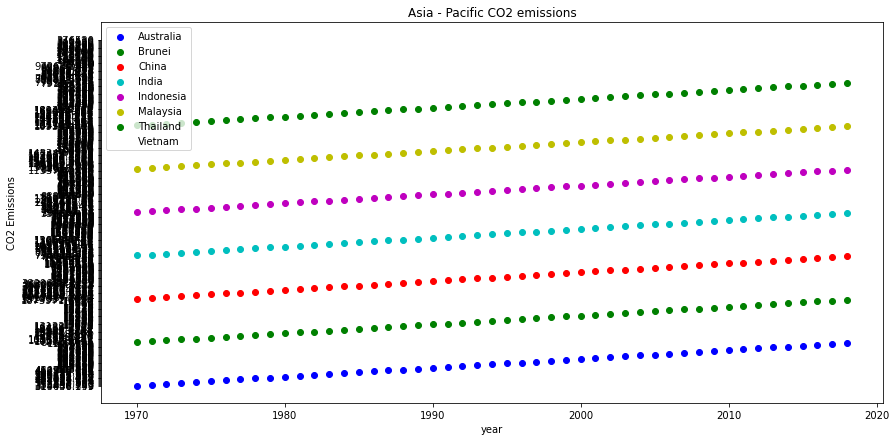

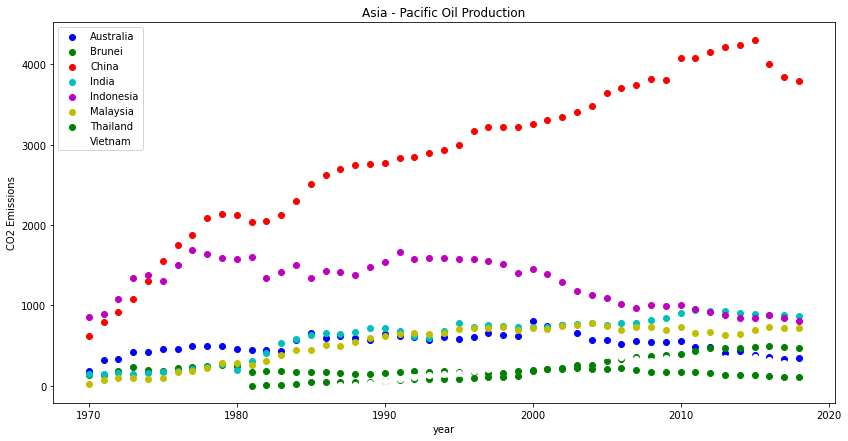

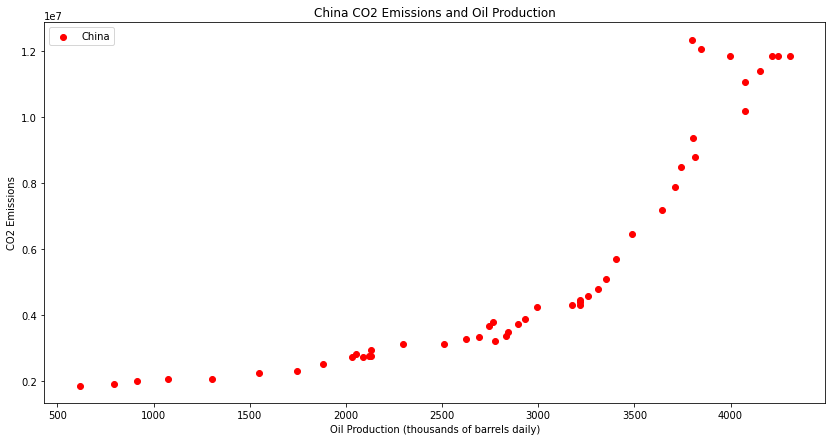

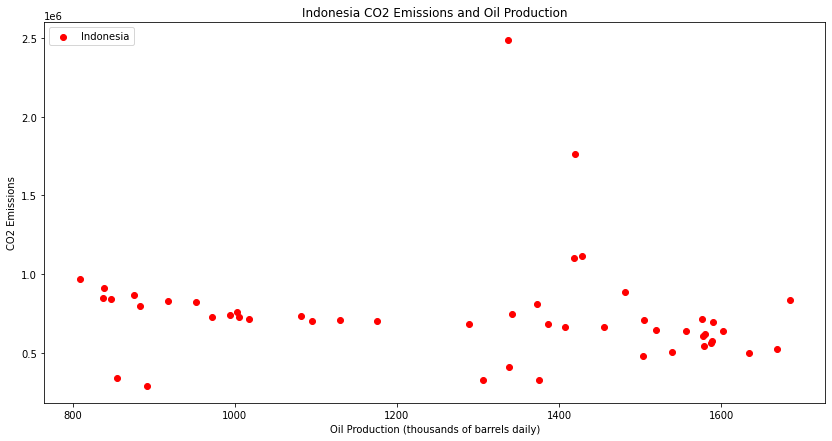

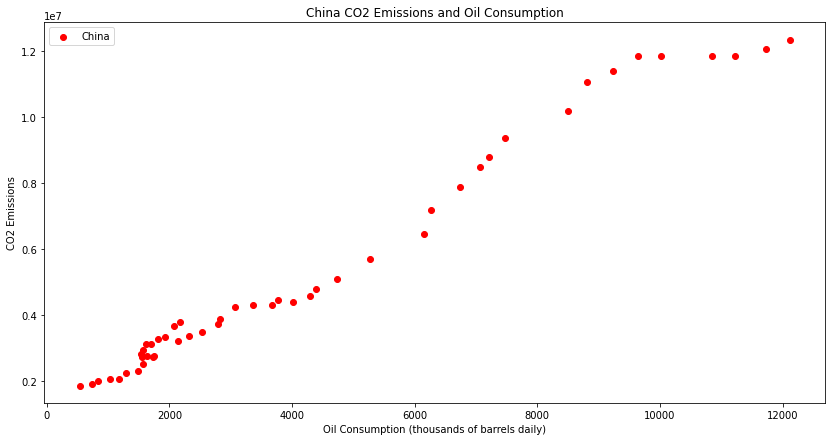

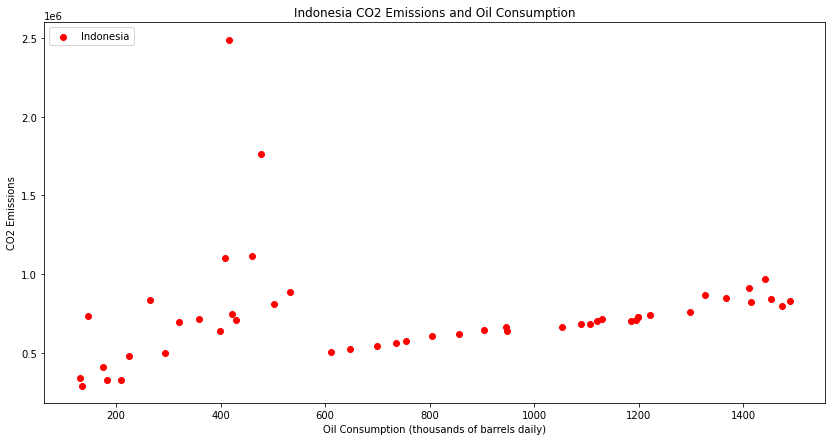

In [144]:
# --- Extract data for Asia Pacific countries, and create an Asia Pacific Dataset ---

australiaBarrelData = countryOilData.loc[['Australia']]
bruneiBarrelData = countryOilData.loc[['Brunei']]
chinaBarrelData = countryOilData.loc[['China']]
indiaBarrelData = countryOilData.loc[['India']]
indonesiaBarrelData = countryOilData.loc[['Indonesia']]
malaysiaBarrelData = countryOilData.loc[['Malaysia']]
thailandBarrelData = countryOilData.loc[['Thailand']]
vietnamBarrelData = countryOilData.loc[['Vietnam']]

australiaCO2Data = countryClimateChangeData.loc[['Australia (CO2)']]
bruneiCO2Data = countryClimateChangeData.loc[['Brunei Darussalam (CO2)']]
chinaCO2Data = countryClimateChangeData.loc[['China (CO2)']]
indiaCO2Data = countryClimateChangeData.loc[['India (CO2)']]
indonesiaCO2Data = countryClimateChangeData.loc[['Indonesia (CO2)']]
malaysiaCO2Data = countryClimateChangeData.loc[['Malaysia (CO2)']]
thailandCO2Data = countryClimateChangeData.loc[['Thailand (CO2)']]
vietnamCO2Data = countryClimateChangeData.loc[['Vietnam (CO2)']]

chinaConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'China']
chinaConsumptionData = chinaConsumptionData.set_index('Year')
chinaConsumptionData = chinaConsumptionData.drop('Entity', axis = 1)
chinaConsumptionData = chinaConsumptionData.rename(columns={"Thousands Barrels Per Day": "China"})
chinaConsumptionData = chinaConsumptionData[5:54]

indonesiaConsumptionData = countryConsumptionData[countryConsumptionData['Entity'] == 'Indonesia']
indonesiaConsumptionData = indonesiaConsumptionData.set_index('Year')
indonesiaConsumptionData = indonesiaConsumptionData.drop('Entity', axis = 1)
indonesiaConsumptionData = indonesiaConsumptionData.rename(columns={"Thousands Barrels Per Day": "Indonesia"})
indonesiaConsumptionData = indonesiaConsumptionData[5:54]

asiaPacificBarrelData = pd.concat([australiaBarrelData, bruneiBarrelData, chinaBarrelData,
                            indiaBarrelData, indonesiaBarrelData, malaysiaBarrelData,
                            thailandBarrelData, vietnamBarrelData]).reset_index()
asiaPacificBarrelData = asiaPacificBarrelData.set_index('year')
asiaPacificBarrelData = asiaPacificBarrelData.T

asiaPacificCO2Data = pd.concat([australiaCO2Data, bruneiCO2Data, chinaCO2Data,
                                indiaCO2Data, indonesiaCO2Data, malaysiaCO2Data,
                                thailandCO2Data, vietnamCO2Data])
asiaPacificCO2Data = asiaPacificCO2Data.T

asiaPacificBarrelData = asiaPacificBarrelData[5:54]
asiaPacificCO2Data = asiaPacificCO2Data[5:54]

#plt.figure(figsize=(14, 7))
#plt.title('China CO2 emissions')
#plt.plot(x, asiaPacificCO2Data['China (CO2)'], c='r')
#plt.xlabel("year")
#plt.ylabel("CO2 Emissions")

chinaProductionRegression = stats.linregress(asiaPacificBarrelData['China'], asiaPacificCO2Data['China (CO2)'].astype(float))
print("China Production R Value: ", chinaProductionRegression.rvalue)

indonesiaProductionRegression = stats.linregress(asiaPacificBarrelData['Indonesia'], asiaPacificCO2Data['Indonesia (CO2)'].astype(float))
print("Indonesia Production R Value: ", indonesiaProductionRegression.rvalue)

chinaConsumptionRegression = stats.linregress(chinaConsumptionData['China'], asiaPacificCO2Data['China (CO2)'].astype(float))
print("China Consumption R Value: ", chinaConsumptionRegression.rvalue)

indonesiaConsumptionRegression = stats.linregress(indonesiaConsumptionData['Indonesia'], asiaPacificCO2Data['Indonesia (CO2)'].astype(float))
print("Indonesia Consumption R Value: ", indonesiaConsumptionRegression.rvalue)


plt.figure(figsize=(14, 7))
plt.title('Asia - Pacific CO2 emissions')
plt.scatter(x, asiaPacificCO2Data['Australia (CO2)'], c='b', label='Australia')
plt.scatter(x, asiaPacificCO2Data['Brunei Darussalam (CO2)'], c='g', label="Brunei")
plt.scatter(x, asiaPacificCO2Data['China (CO2)'], c='r', label="China")
plt.scatter(x, asiaPacificCO2Data['India (CO2)'], c='c', label="India")
plt.scatter(x, asiaPacificCO2Data['Indonesia (CO2)'], c='m', label="Indonesia")
plt.scatter(x, asiaPacificCO2Data['Malaysia (CO2)'], c='y', label="Malaysia")
plt.scatter(x, asiaPacificCO2Data['Thailand (CO2)'], c='g', label="Thailand")
plt.scatter(x, asiaPacificCO2Data['Vietnam (CO2)'], c='w', label="Vietnam")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Asia - Pacific Oil Production')
plt.scatter(x, asiaPacificBarrelData['Australia'], c='b', label='Australia')
plt.scatter(x, asiaPacificBarrelData['Brunei'], c='g', label="Brunei")
plt.scatter(x, asiaPacificBarrelData['China'], c='r', label="China")
plt.scatter(x, asiaPacificBarrelData['India'], c='c', label="India")
plt.scatter(x, asiaPacificBarrelData['Indonesia'], c='m', label="Indonesia")
plt.scatter(x, asiaPacificBarrelData['Malaysia'], c='y', label="Malaysia")
plt.scatter(x, asiaPacificBarrelData['Thailand'], c='g', label="Thailand")
plt.scatter(x, asiaPacificBarrelData['Vietnam'], c='w', label="Vietnam")
plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('China CO2 Emissions and Oil Production')
plt.scatter(asiaPacificBarrelData['China'], asiaPacificCO2Data['China (CO2)'].astype(float), c='r', label='China')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Indonesia CO2 Emissions and Oil Production')
plt.scatter(asiaPacificBarrelData['Indonesia'], asiaPacificCO2Data['Indonesia (CO2)'].astype(float), c='r', label='Indonesia')
plt.legend(loc="upper left")
plt.xlabel("Oil Production (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('China CO2 Emissions and Oil Consumption')
plt.scatter(chinaConsumptionData['China'], asiaPacificCO2Data['China (CO2)'].astype(float), c='r', label='China')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

plt.figure(figsize=(14, 7))
plt.title('Indonesia CO2 Emissions and Oil Consumption')
plt.scatter(indonesiaConsumptionData['Indonesia'], asiaPacificCO2Data['Indonesia (CO2)'].astype(float), c='r', label='Indonesia')
plt.legend(loc="upper left")
plt.xlabel("Oil Consumption (thousands of barrels daily)")
plt.ylabel("CO2 Emissions")

In [145]:
totalWorldProduction = pd.concat([northAmericaBarrelData, southCentralAmericaBarrelData, europeBarrelData, cisBarrelData,
                                  middleEastBarrelData, africaBarrelData, asiaPacificBarrelData], axis=1)
#totalWorldProduction
totalWorldProduction.to_csv('./datasets/totalWorldOilProduction.csv', index=False) 
#northAmericaCO2Dat